In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

#Regressoors
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge , Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, AdaBoostRegressor 
from xgboost import XGBRegressor

#PCA
from sklearn.decomposition import RandomizedPCA, PCA
#MDS
from sklearn.manifold import MDS
#SNE
from sklearn.manifold import TSNE

#Train Test Split
from sklearn.cross_validation import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error as MSE

import statsmodels.api as sm
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from ipywidgets import interact, interact_manual

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
Data = pd.read_csv('20190318.txt', sep=' ')
Data = Data.iloc[:1024,4:-1].T
Vals = Data.iloc[0,:].values
Data.iloc[0,:] = map(lambda x : int(x), Vals)
Data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
Spectrum1,80,62,61,28,25,55,44,32,45,47,...,921,913,879,893,893,852,868,865,869,874
Spectrum2,47,27,73,56,33,57,46,26,52,76,...,928,909,921,933,907,896,910,868,922,908
Spectrum3,63,47,49,37,62,13,24,48,60,46,...,934,940,929,946,968,909,960,914,939,953
Spectrum4,64,33,76,40,49,54,39,22,33,45,...,966,976,965,964,959,950,957,922,931,962
Spectrum5,38,55,79,53,86,64,47,42,28,17,...,886,864,894,882,886,869,868,851,878,867
Spectrum6,77,51,40,48,46,54,49,63,51,52,...,819,885,836,839,841,829,859,817,836,828
Spectrum7,38,47,40,56,52,57,45,44,31,65,...,803,812,822,816,821,806,793,785,806,805
Spectrum8,93,39,33,43,58,21,55,54,64,32,...,800,814,780,791,819,790,799,791,775,783
Spectrum9,61,53,56,55,30,47,51,52,36,48,...,794,780,761,770,764,777,778,728,760,774
Spectrum10,50,37,71,45,43,38,67,54,63,42,...,749,757,735,742,731,745,729,755,748,762


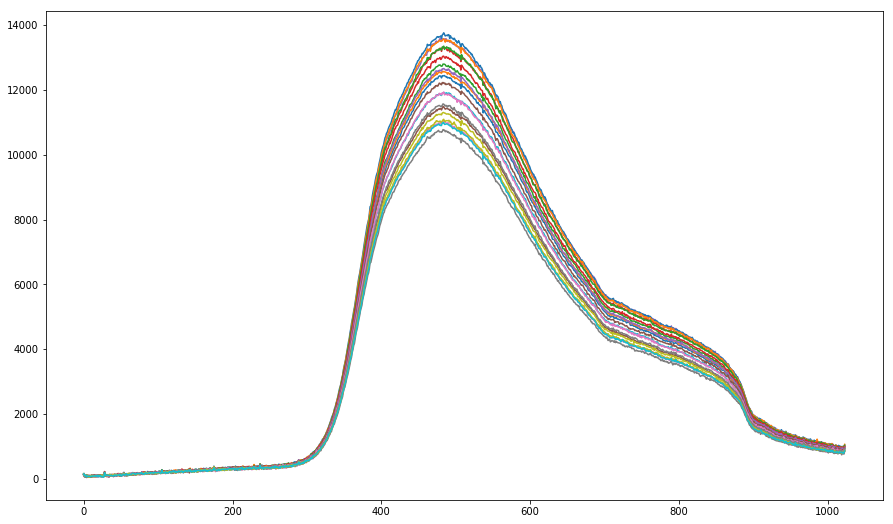

In [3]:
plt.figure(figsize=(15,9))
for i in range(20,40):
    plt.plot(range(Data.shape[1]) , Data.iloc[i,:].values)

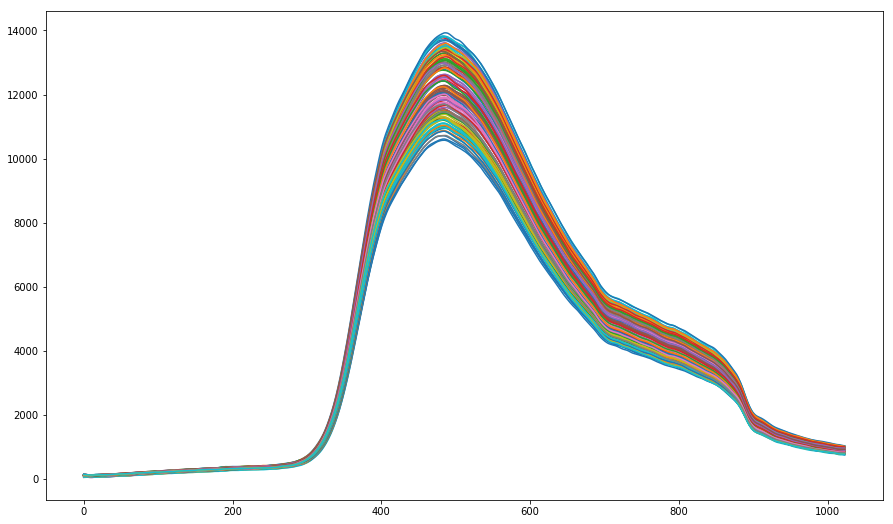

In [4]:
data_lowess_1 = list()
plt.figure(figsize=(15,9))
for i in range(Data.shape[0]) :
    x = range(Data.shape[1])
    y = Data.iloc[i].values
    lowess = sm.nonparametric.lowess(y, x, frac=0.015)
    plt.plot(lowess[:,0], lowess[:,1])
    data_lowess_1.append(lowess[:,1])

lowess_df = pd.DataFrame(np.array(data_lowess_1))

In [5]:
scaler = MinMaxScaler()
#for i in range(lowess_df.shape[0]):
scaler.fit(lowess_df.T)
lowess_df = pd.DataFrame(scaler.transform(lowess_df.T)).T

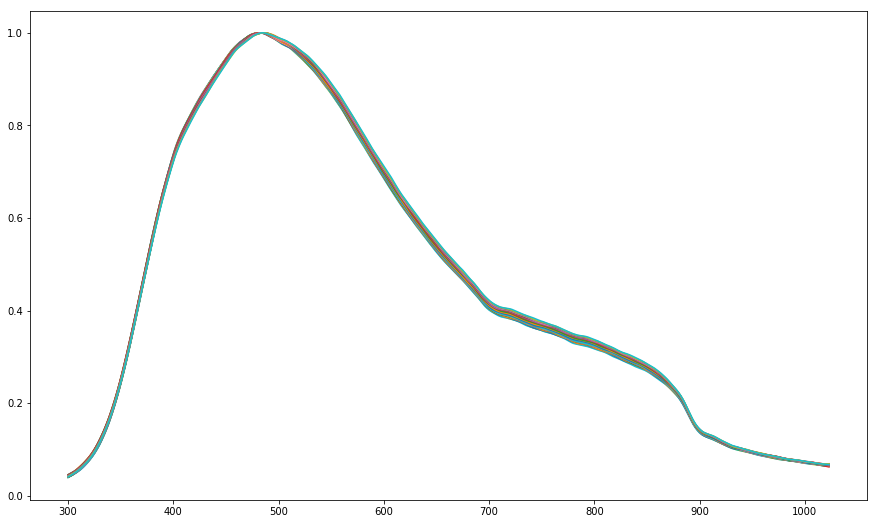

In [6]:
plt.figure(figsize=(15,9))
for i in range(50):
    plt.plot(range(300,1024) ,lowess_df.iloc[i,300:].values)

## Добавим целевые значения для регрессии pH

In [7]:
pH = np.array([3.65]*10+[3.64]*10+[3.63]*10+[3.62]*10+[3.61]*10+[3.60]*10+[3.59]*10+[3.58]*10+[3.56]*10+[3.53]*10+[3.52]*10+[3.50]*10+[3.48]*10)
lowess_df['pH'] = pH
lowess_df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,pH
0,0.001613,0.001352,0.001107,0.000873,0.000644,0.000414,0.000184,0.000012,0.000000,0.000075,...,0.067144,0.066728,0.066338,0.065994,0.065651,0.065304,0.064955,0.064609,0.064272,3.65
1,0.000000,0.000066,0.000136,0.000215,0.000304,0.000403,0.000505,0.000591,0.000742,0.000920,...,0.066915,0.066666,0.066491,0.066366,0.066240,0.066109,0.065975,0.065842,0.065716,3.65
2,0.000441,0.000346,0.000264,0.000194,0.000133,0.000080,0.000031,0.000000,0.000126,0.000311,...,0.067013,0.066938,0.066883,0.066877,0.066883,0.066892,0.066900,0.066906,0.066914,3.65
3,0.000716,0.000579,0.000450,0.000332,0.000225,0.000133,0.000056,0.000000,0.000073,0.000189,...,0.067551,0.067212,0.066832,0.066509,0.066202,0.065899,0.065596,0.065291,0.064989,3.65
4,0.002432,0.002211,0.001972,0.001723,0.001469,0.001220,0.000974,0.000663,0.000346,0.000106,...,0.067553,0.067341,0.067149,0.066992,0.066840,0.066683,0.066520,0.066352,0.066183,3.65
5,0.000362,0.000297,0.000237,0.000178,0.000115,0.000051,0.000000,0.000016,0.000106,0.000227,...,0.066421,0.066061,0.065746,0.065442,0.065144,0.064856,0.064579,0.064312,0.064054,3.65
6,0.000000,0.000073,0.000142,0.000210,0.000282,0.000361,0.000447,0.000518,0.000598,0.000670,...,0.065816,0.065360,0.065044,0.064795,0.064564,0.064335,0.064104,0.063872,0.063645,3.65
7,0.000000,0.000110,0.000219,0.000325,0.000428,0.000530,0.000636,0.000769,0.000870,0.000935,...,0.066831,0.066511,0.066188,0.065861,0.065548,0.065245,0.064951,0.064661,0.064371,3.65
8,0.000676,0.000559,0.000450,0.000350,0.000256,0.000164,0.000073,0.000000,0.000032,0.000118,...,0.065281,0.065104,0.064945,0.064814,0.064693,0.064578,0.064465,0.064351,0.064240,3.65
9,0.000291,0.000333,0.000373,0.000409,0.000440,0.000461,0.000470,0.000466,0.000400,0.000335,...,0.065384,0.065014,0.064914,0.064874,0.064847,0.064836,0.064844,0.064876,0.064933,3.65


In [8]:
lowess_df.to_csv('prep_data_20190318.csv', sep=',')

## PCA

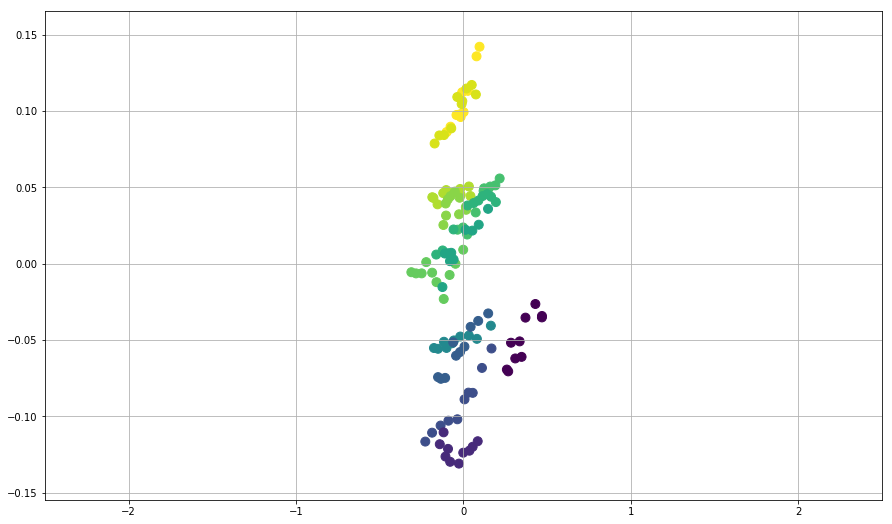

In [25]:
pca_model = PCA(n_components=3)
pca_data = pd.DataFrame(pca_model.fit_transform(lowess_df.drop('pH', axis=1)))
pca_data['pH'] = lowess_df.pH.values

plt.figure(figsize=(15,9))
plt.scatter(pca_data.iloc[:,0], pca_data.iloc[:,1], c=pca_data.pH.values[:], s=80)
plt.xlim(-2.5,2.5)
#plt.ylim(-0.2,0.2)
plt.grid()

In [24]:
pca_data.to_csv('pca_data_20190318.csv', sep=',')

In [26]:
@interact
def plot(num = (0,15,1)):
    plt.figure(figsize=(15,9))
    plt.scatter(pca_data.iloc[num*10:num*10+10,0], pca_data.iloc[num*10:num*10+10,1], c=pca_data.pH.values[num*10:num*10+10], s=80)
    plt.xlim(-1.5,1.5)
    plt.ylim(-0.2,0.2)
    plt.grid()

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT03LCBkZXNjcmlwdGlvbj11J251bScsIG1heD0xNSksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2VzPSh1J3dpZGdldC1pbnRlcmHigKY=


## Отсортируем по значению pH

In [27]:
pca_data.sort_values('pH', axis=0, inplace=True)
pca_data.head(20)

,0,1,2,pH
129,0.469744,-0.034175,0.015385,3.48
120,0.348038,-0.060953,0.003592,3.48
121,0.336464,-0.050805,0.013649,3.48
122,0.310231,-0.061992,0.009378,3.48
123,0.284807,-0.051692,0.028751,3.48
128,0.469426,-0.035112,0.007510,3.48
125,0.260073,-0.069273,0.044517,3.48
126,0.371270,-0.035259,0.019353,3.48
127,0.430411,-0.026323,0.020662,3.48
124,0.268195,-0.070456,0.037707,3.48


## Посмотрим на все различные значения pH

In [29]:
pca_data.drop_duplicates(subset='pH')

,0,1,2,pH
129,0.469744,-0.034175,0.015385,3.48
110,-0.140619,-0.118161,0.001156,3.50
100,0.168305,-0.055460,-0.014934,3.52
90,-0.019766,-0.057802,0.012932,3.53
80,0.164466,-0.040527,-0.046476,3.56
70,-0.124787,-0.015236,0.021880,3.58
69,-0.161809,0.006054,0.050555,3.59
50,-0.034463,0.022354,0.047135,3.60
40,-0.000716,0.009239,-0.038707,3.61
30,-0.103233,0.031609,-0.011110,3.62


## 1) Случайные выборки

Test Data :  [3.48 3.63 3.65 3.65 3.6  3.53 3.63 3.52 3.59 3.64 3.5  3.53 3.52 3.48
 3.48 3.48 3.5  3.61 3.58 3.59 3.58 3.59 3.6  3.64 3.63 3.52 3.62 3.65
 3.53 3.56 3.5  3.53 3.63 3.52 3.48 3.65 3.64 3.59 3.6 ]
Predictions :  [3.48 3.62 3.65 3.62 3.6  3.53 3.63 3.51 3.6  3.64 3.5  3.55 3.52 3.57
 3.48 3.48 3.5  3.61 3.59 3.59 3.58 3.61 3.6  3.64 3.62 3.51 3.63 3.65
 3.54 3.56 3.51 3.55 3.62 3.51 3.48 3.63 3.65 3.6  3.58]
Delta :  [ 0.    0.01  0.    0.03  0.    0.    0.    0.01 -0.01  0.    0.   -0.02
  0.   -0.09  0.    0.    0.    0.   -0.01  0.    0.   -0.02  0.    0.
  0.01  0.01 -0.01  0.   -0.01  0.   -0.01 -0.02  0.01  0.01  0.    0.02
 -0.01 -0.01  0.02]
Mean Squared Error :  0.017759071354792585


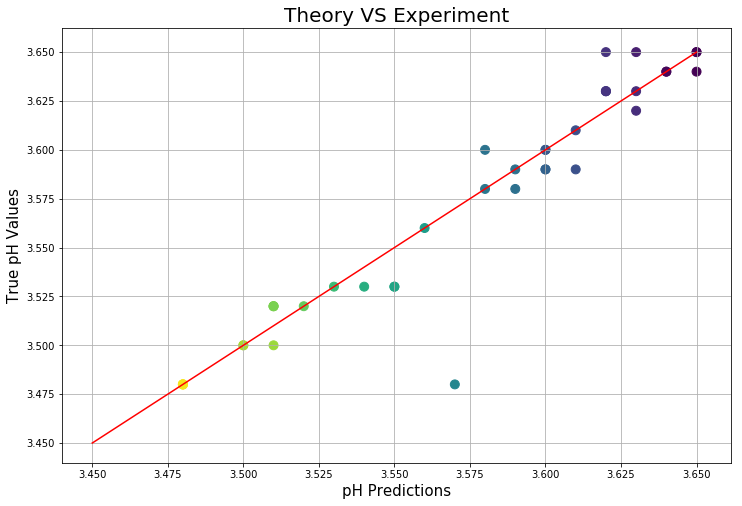

In [31]:
train_data, test_data, train_target, test_target = train_test_split(pca_data.drop('pH', axis=1), pca_data.pH,
                                                                   test_size=0.3, random_state=123)

regressor = GradientBoostingRegressor(learning_rate=0.07) #GradientBoostingRegressor(learning_rate=0.07) #LinearRegression()
regressor.fit(train_data, train_target)
preds = regressor.predict(test_data)
 
print 'Test Data : ', test_target.values
print 'Predictions : ', preds.round(2)
print 'Delta : ', test_target.values - preds.round(2)
print 'Mean Squared Error : ', np.sqrt(MSE(test_target.values, preds.round(2)))

plt.figure(figsize=(12,8))
plt.plot(np.arange(3.45,3.7,0.1), np.arange(3.45,3.7,0.1), c='r')
plt.scatter(preds.round(2) , test_target.values, c=1-(preds-preds.min())/preds.max(), s=80)
plt.xlabel('pH Predictions', fontsize=15)
plt.ylabel('True pH Values', fontsize=15)
plt.title('Theory VS Experiment', fontsize=20)

plt.grid()

In [32]:
mse_array = []
scores = []
for i in range(100):
    train_data, test_data, train_target, test_target = train_test_split(pca_data.drop('pH', axis=1), pca_data.pH,
                                                                   test_size=0.3, random_state=i)

    regressor = GradientBoostingRegressor(learning_rate=0.07) #LinearRegression() #GradientBoostingRegressor(learning_rate=0.07)
    regressor.fit(train_data, train_target)
    preds = regressor.predict(test_data)
    
    mse_array.append(MSE(test_target.values, preds.round(2)))
    scores.append(regressor.score(test_data, test_target))
    
print 'MSE : ', mse_array[:20]
print 
print 'Corrs : ', scores[:20]
print 
print 'Среднее MSE по 100 случайным выборкам : ', np.sqrt(np.mean(mse_array)).round(4)
print 'Средняя корреляция по 100 случайным выборкам : ', np.mean(scores).round(4)

MSE :  [0.00036410256410256456, 0.00020512820512820392, 7.948717948717929e-05, 0.00010256410256410207, 8.46153846153849e-05, 8.974358974358979e-05, 0.00017948717948717915, 8.461538461538422e-05, 8.974358974358933e-05, 0.0003076923076923074, 0.00016923076923076866, 7.435897435897371e-05, 0.0003410256410256415, 0.0001487179487179488, 0.00013333333333333266, 0.0003076923076923067, 0.000174358974358974, 9.74358974358983e-05, 0.0001435897435897441, 0.0003538461538461531]

Corrs :  [0.8606000481232319, 0.9203016204572271, 0.9808905903918009, 0.9710284661270214, 0.9752370938982428, 0.9677125036214734, 0.9349410598469661, 0.9670391121433654, 0.9700074050607214, 0.8715588072427869, 0.9398430879139149, 0.9788717567435987, 0.9156940795169115, 0.9396899308959933, 0.9512616880579488, 0.8845814004774675, 0.9435182016400191, 0.9593615357790976, 0.9533029947242088, 0.8913930724147032]

Среднее MSE по 100 случайным выборкам :  0.0132
Средняя корреляция по 100 случайным выборкам :  0.9416


## 2) Возьмем на обучение выборочные значения pH : 
* Первые 4 и последние 4

Train Data :  [3.48 3.48 3.48 3.48 3.48 3.48 3.48 3.48 3.48 3.48 3.5  3.5  3.5  3.5
 3.5  3.5  3.5  3.5  3.5  3.5  3.52 3.52 3.52 3.52 3.52 3.52 3.52 3.52
 3.52 3.52 3.53 3.53 3.53 3.53 3.53 3.53 3.53 3.53 3.53 3.53 3.62 3.62
 3.62 3.62 3.62 3.62 3.62 3.62 3.62 3.62 3.63 3.63 3.63 3.63 3.63 3.63
 3.63 3.63 3.63 3.63 3.64 3.64 3.64 3.64 3.64 3.64 3.64 3.64 3.64 3.64
 3.65 3.65 3.65 3.65 3.65 3.65 3.65 3.65 3.65 3.65]
Test Data :  [3.56 3.56 3.56 3.56 3.56 3.56 3.56 3.56 3.56 3.56 3.58 3.58 3.58 3.58
 3.58 3.58 3.58 3.58 3.58 3.58 3.59 3.59 3.59 3.59 3.59 3.59 3.59 3.59
 3.59 3.59 3.6  3.6  3.6  3.6  3.6  3.6  3.6  3.6  3.6  3.6  3.61 3.61
 3.61 3.61 3.61 3.61 3.61 3.61 3.61 3.61]
Predictions :  [3.54 3.55 3.55 3.56 3.56 3.56 3.56 3.56 3.56 3.56 3.57 3.59 3.58 3.58
 3.57 3.58 3.58 3.58 3.58 3.58 3.58 3.58 3.58 3.58 3.58 3.58 3.58 3.58
 3.58 3.58 3.58 3.58 3.57 3.58 3.58 3.58 3.58 3.58 3.58 3.58 3.59 3.6
 3.59 3.59 3.6  3.61 3.6  3.6  3.6  3.6 ]
Delta :  [ 0.02  0.01  0.01  0.    0.    0.

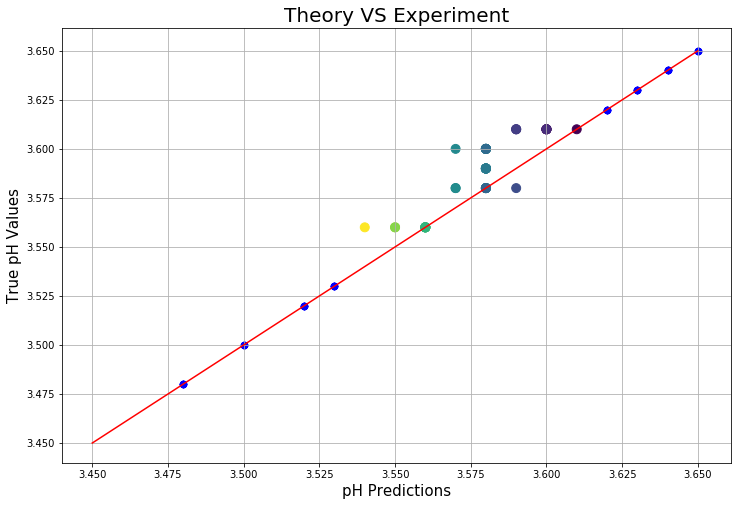

In [34]:
train_data = pca_data.drop('pH', axis=1).iloc[range(40)+range(90,130),:].values
train_target = pca_data.iloc[range(40)+range(90,130),:].pH.values

test_data = pca_data.drop('pH', axis=1).iloc[40:90].values
test_target = pca_data.pH.iloc[40:90].values

regressor = LinearRegression() #GradientBoostingRegressor(learning_rate=0.07) #LinearRegression()
regressor.fit(train_data, train_target)
preds = regressor.predict(test_data)

print 'Train Data : ', train_target
print 'Test Data : ', test_target
print 'Predictions : ', preds.round(2)
print 'Delta : ', test_target - preds.round(2)
print 'Mean Squared Error : ', np.sqrt(MSE(test_target, preds.round(2))).round(4)
print 'Pearson Correlation : ', regressor.score(test_data, test_target).round(4)

plt.figure(figsize=(12,8))

plt.plot(np.arange(3.45,3.7,0.1), np.arange(3.45,3.7,0.1), c='r')
plt.scatter(preds.round(2) , test_target, c=1-(preds-preds.min())/preds.max(), s=80)
plt.scatter(train_target, train_target, c='b', s=40)

plt.xlabel('pH Predictions', fontsize=15)
plt.ylabel('True pH Values', fontsize=15)
plt.title('Theory VS Experiment', fontsize=20)

plt.grid()

### Проверим, не пересекаются ли множества обучающей и тестовой выборок

In [35]:
a = set(np.sort(pca_data.iloc[50:80].pH.values))
b = set(pca_data.iloc[range(50)+range(80,130),:].pH.drop_duplicates().values)

print np.sort(pca_data.pH.drop_duplicates().values)
print 
print a
print b
print a&b

[3.48 3.5  3.52 3.53 3.56 3.58 3.59 3.6  3.61 3.62 3.63 3.64 3.65]

set([3.58, 3.6, 3.59])
set([3.5, 3.63, 3.64, 3.52, 3.65, 3.53, 3.48, 3.61, 3.62, 3.56])
set([])
